In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import squarify
import matplotlib.patches as Wedge
import colorcet as cc
import matplotlib.colors as mcolors

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# Meses pós-doutorado

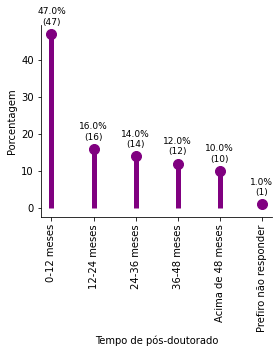

In [68]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
df = pd.DataFrame(df['2.1_posdoc_experience'].value_counts()).reset_index()
df.columns = ['2.1_posdoc_experience', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / df['count'].sum()) * 100).round(1)

# Create the rotated lollipop plot
plt.figure(figsize=(4, 5))
plt.vlines(x=df['2.1_posdoc_experience'], ymin=0, ymax=df['percentage'], color='purple', linewidth = 5)
plt.plot(df['2.1_posdoc_experience'], df['percentage'], "o", color="purple", markersize=10)

# Customize the plot
plt.ylabel('Porcentagem')
plt.xlabel('Tempo de pós-doutorado')
plt.xticks(rotation=90)

# Add annotations with percentage and count above each dot
for i, row in df.iterrows():
    plt.text(
        row['2.1_posdoc_experience'], row['percentage'] + 2,  # Adjust the vertical position slightly above the dot
        f"{row['percentage']}%\n({row['count']})",  # Format as "percentage% (count)"
        ha='center', va='bottom', fontsize=9
    )

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
# plt.savefig('/.../Figure_4a.pdf')
plt.show()

# Mudou de instituição

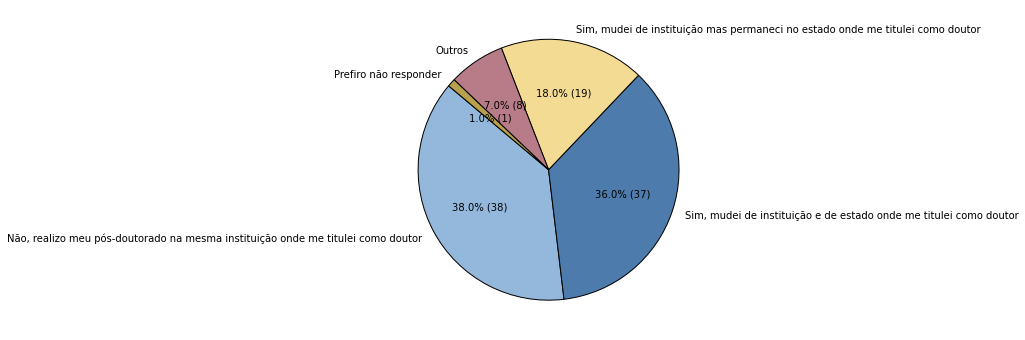

In [69]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
df = pd.DataFrame(df['2.2_chage_institution_posdoc'].value_counts()).reset_index()
df.columns = ['2.2_chage_institution_posdoc', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / df['count'].sum()) * 100).round(1)

# Function to lighten a color by blending it with white
def lighten_color(color, amount=0.5):
    return mcolors.to_rgba_array(color) * (1 - amount) + mcolors.to_rgba_array("white") * amount

# Define the original Tol Medium-Contrast colors
tol_medium_contrast_colors = [
    "#6699CC", "#004488", "#EECC66", "#994455", "#997700",
    "#EE99AA", "#BBBBBB", "#77AADD", "#AA4488", "#DDDD77"
]

# Create a lighter (pale) version of the Tol Medium-Contrast colors
pale_tol_medium_contrast_colors = [lighten_color(color, 0.3)[0] for color in tol_medium_contrast_colors]

# Custom function to display percentage and count
def autopct_format(pct):
    total = df['count'].sum()
    count = int(pct * total / 100.0)
    return f'{pct:.1f}% ({count+1})'

# Use Seaborn to get the 'tab20' color palette
colors = sns.color_palette("Pastel1", len(df))

# Create pie chart with black edges and custom labels
plt.figure(figsize=(8, 6))
plt.pie(
    df['percentage'], 
    labels=df['2.2_chage_institution_posdoc'], 
    autopct=autopct_format, 
    startangle=140,
    colors=pale_tol_medium_contrast_colors[:len(df)],  # Apply tab20 color palette
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Set edge color and width
)

# plt.savefig('/.../Figure_4b.pdf')
plt.show()

# Motivação intercâmbio internacional

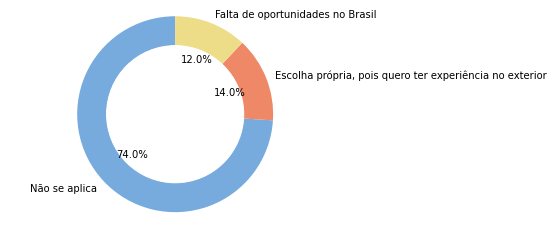

In [70]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
df = pd.DataFrame(df['2.3_international_motivation'].value_counts()).reset_index()
df.columns = ['2.3_international_motivation', 'count']  # Renaming columns for clarity

# Tol Light colors (hex codes)
tol_light_colors = [
    "#77AADD", "#EE8866", "#EEDD88", "#FFAABB", "#99DDFF",
    "#44BB99", "#BBCC33", "#AAAA00", "#DDDDDD", "#DDDD77"
]


cmap = plt.get_cmap('Dark2')
custom_colors = cmap(np.linspace(0, 1, len(df)))

# Define a custom autopct function to show percentages in parentheses
def autopct_format(pct):
    return f'({pct:.1f}%)'

# Create a donut chart
labels = df['2.3_international_motivation']
sizes = df['count']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, wedgeprops=dict(width=0.3), startangle=90, autopct='%1.1f%%', colors=tol_light_colors[:len(df)])

# Draw a circle in the center to make it a donut
center_circle = plt.Circle((0, 0), 0.70, color='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures the pie is drawn as a circle.
ax.axis('equal')

# Display the chart
# plt.savefig('/.../Figure_4c.pdf')
plt.show()


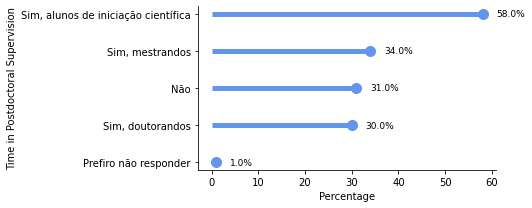

In [3]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')

total = pd.DataFrame(df['2.6_posgrad_supervision'].fillna('N/A'))
total = total[total['2.6_posgrad_supervision'] != 'N/A'][['2.6_posgrad_supervision']]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df['2.6_posgrad_supervision'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = ['2.6_posgrad_supervision', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

# Sort by 'count' or 'percentage' in descending order
df = df.sort_values(by='percentage', ascending=True)

# Create the vertical lollipop plot
plt.figure(figsize=(7.5, 3))
plt.hlines(y=df['2.6_posgrad_supervision'], xmin=0, xmax=df['percentage'], color='cornflowerblue', linewidth=5)
plt.plot(df['percentage'], df['2.6_posgrad_supervision'], "o", color="cornflowerblue", markersize=10)

# Customize the plot
plt.xlabel('Percentage')
plt.ylabel('Time in Postdoctoral Supervision')
plt.yticks(rotation=0)  # Keep the y-axis labels horizontal

# Add annotations with percentage and count to the right of each dot
for i, row in df.iterrows():
    plt.text(
        row['percentage'] + 3, row['2.6_posgrad_supervision'],  # Adjust horizontal position slightly to the right
        f"{row['percentage']}%",  # Format as "percentage% (count)"
        ha='left', va='center', fontsize=9
    )

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
# plt.savefig('/.../Figure_4d.pdf')
plt.show()


# Número de alunos

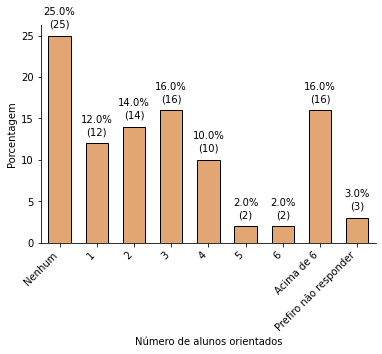

In [72]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
df = pd.DataFrame(df['2.7_supervision_total'].value_counts()).reset_index()
df.columns = ['2.7_supervision_total', 'count']  # Renaming columns for clarity

# Move "Nenhum" to the top and sort the rest in ascending order
df = df.set_index('2.7_supervision_total')  # Set the column as index temporarily
df = pd.concat([df.loc[['Nenhum']], df.drop(index='Nenhum').sort_values(by='2.7_supervision_total', ascending=True)]).reset_index()

# Add a new column for the percentage
df['percentage'] = ((df['count'] / df['count'].sum()) * 100).round(1)

# Creating a bar plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df, x='2.7_supervision_total', y='percentage', 
                 width=0.6, color='sandybrown', edgecolor='black')
plt.xlabel('Número de alunos orientados')
plt.ylabel('Porcentagem')

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding percentage and count labels above each bar
for i, row in df.iterrows():
    percentage = row['percentage']
    count = row['count']
    ax.text(i, percentage + 2.5, f'{percentage}%', ha='center', color='black')      # Count label    
    ax.text(i, percentage + 1, f'({count})', ha='center', color='black')  # Percentage label

# plt.savefig('/.../Figure_4e.pdf')

plt.show()

# Experiência ensino

In [37]:
import plotly.graph_objects as go
import plotly.io as pio

# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')

total = pd.DataFrame(df['2.8_teaching_exp'].fillna('N/A'))
total = total[total['2.8_teaching_exp'] != 'N/A'][['2.8_teaching_exp']]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df['2.8_teaching_exp'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = ['2.8_teaching_exp', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

# Define Sankey plot nodes and links
source = [0] * len(df)  # All flows start from the main source node '0'
target = list(range(1, len(df) + 1))  # Each category is a separate target node
values = df['count'].tolist()  # Values representing the count for each category

# Node labels (main source + each category with count and percentage)
labels = ['Total Responses'] + [
    f"{row['2.8_teaching_exp']}\n{row['percentage']}%" for _, row in df.iterrows()
]

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightsalmon"
    ),
    link=dict(
        source=source,  # Starting node for each flow
        target=target,  # Ending node for each flow
        value=values,   # Flow values (counts)
        color="bisque"
    )
))

# Update layout with custom width and height
fig.update_layout(
    font_size=10,
    width=500,
    height=400
)

# pio.write_image(fig, '/.../Figure_4f.pdf', format='pdf')

fig.show()

# Direitos e deveres

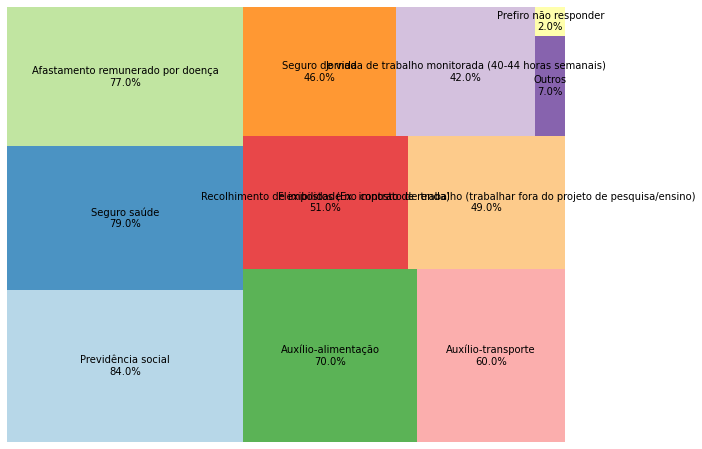

In [39]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')

total = pd.DataFrame(df['2.10_rights_duties_postdocs'].fillna('N/A'))
total = total[total['2.10_rights_duties_postdocs'] != 'N/A'][['2.10_rights_duties_postdocs']]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df['2.10_rights_duties_postdocs'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = ['2.10_rights_duties_postdocs', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

# Prepare labels to show "Answer\nCount (Percentage%)" format
df['label'] = df.apply(lambda x: f"{x['2.10_rights_duties_postdocs']}\n{x['percentage']}%", axis=1)

# Plotting the treemap
plt.figure(figsize=(10, 8))
squarify.plot(
    sizes=df['count'], 
    label=df['label'], 
    alpha=0.8, 
    color=sns.color_palette("Paired", len(df))
)
plt.axis('off')

# plt.savefig('/.../Figure_4g.pdf')
plt.show()

In [26]:
df

,2.10_rights_duties_postdocs,count,percentage
0,Previdência social,84,84.0
1,Seguro saúde,79,79.0
2,Afastamento remunerado por doença,77,77.0
3,Auxílio-alimentação,70,70.0
4,Auxílio-transporte,60,60.0
5,Recolhimento de impostos (Ex. imposto de renda),51,51.0
6,Flexibilidade no contrato de trabalho (trabalh...,49,49.0
7,Seguro de vida,46,46.0
8,Jornada de trabalho monitorada (40-44 horas se...,42,42.0
9,Outros,7,7.0


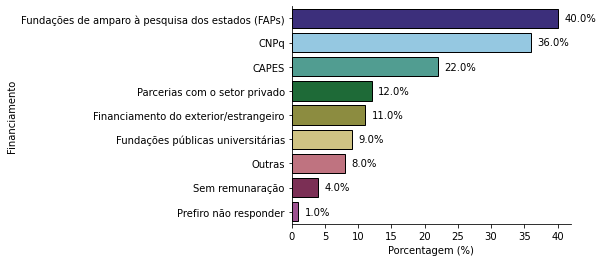

In [36]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')

total = pd.DataFrame(df['2.5_posdoc_financing'].fillna('N/A'))
total = total[total['2.5_posdoc_financing'] != 'N/A'][['2.5_posdoc_financing']]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df['2.5_posdoc_financing'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = ['2.5_posdoc_financing', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

# Define the Tol Muted color palette manually
tol_muted_colors = [
    "#332288", "#88CCEE", "#44AA99", "#117733", "#999933",
    "#DDCC77", "#CC6677", "#882255", "#AA4499", "#661100"
]

# Set up Seaborn to use this custom colormap
sns.set_palette(tol_muted_colors)

plt.figure(figsize=(5, 4))

# Plotting counts for the "2.5_posdoc_financing" column in a horizontal bar plot
ax = sns.barplot(data=df, x='percentage', y='2.5_posdoc_financing', edgecolor='black')
plt.xlabel("Porcentagem (%)")
plt.ylabel("Financiamento")

# Label each bar with percentage and count
for index, row in df.iterrows():
    ax.text(
        row['percentage'] + 1, index,  # Positioning to the right of each bar
        f"{row['percentage']}%",  # Format: "percentage% (count)"
        color='black', va="center"
    )

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.savefig('/.../Figure_4h.pdf')
plt.show()